In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier,export_graphviz, plot_tree, export_text
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot



tabela = pd.read_excel("dados_integrado.xlsx")
display(tabela)

display(tabela.columns)

,Nome,Nota_Matemática,Pontuação_Final,Reserva_de_vaga,Curso,Semestre
0,Thayssa Ferreira Rodrigues,6.7,8.22,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,2018.2
1,Pablo Samuel Silva do Nascimento,7.5,7.96,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,2018.2
2,Rafael Rocha Araújo,9.8,7.79,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,2018.2
3,Maria Paulla Costa da Silva,8.4,7.52,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,2018.2
4,Alana Vitória Batista Pereira,6.7,7.32,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,2018.2
...,...,...,...,...,...,...
463,Maria Joseane Lima de Sales,6.0,7.00,L6,Técnico Integrado em Telecomunicações - Campus...,2020.1
464,Evelly Morgana de Oliveira Pontes,6.3,6.83,L6,Técnico Integrado em Telecomunicações - Campus...,2020.1
465,Jonas Lopes Marcelino,7.4,6.79,L6,Técnico Integrado em Telecomunicações - Campus...,2020.1
466,Maria Nicole Queiroz Costa,8.1,6.33,L8,Técnico Integrado em Telecomunicações - Campus...,2020.1


Index(['Nome', 'Nota_Matemática', 'Pontuação_Final', 'Reserva_de_vaga',
       'Curso', 'Semestre'],
      dtype='object')

In [3]:
tabela=tabela[['Semestre','Nota_Matemática', 'Reserva_de_vaga','Curso','Pontuação_Final']]
display(tabela)

,Semestre,Nota_Matemática,Reserva_de_vaga,Curso,Pontuação_Final
0,2018.2,6.7,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,8.22
1,2018.2,7.5,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,7.96
2,2018.2,9.8,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,7.79
3,2018.2,8.4,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,7.52
4,2018.2,6.7,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,7.32
...,...,...,...,...,...
463,2020.1,6.0,L6,Técnico Integrado em Telecomunicações - Campus...,7.00
464,2020.1,6.3,L6,Técnico Integrado em Telecomunicações - Campus...,6.83
465,2020.1,7.4,L6,Técnico Integrado em Telecomunicações - Campus...,6.79
466,2020.1,8.1,L8,Técnico Integrado em Telecomunicações - Campus...,6.33


In [61]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Semestre         468 non-null    float64
 1   Nota Matemática  468 non-null    float64
 2   Reserva de vaga  468 non-null    object 
 3   Curso            468 non-null    object 
 4   Pontuação Final  468 non-null    float64
dtypes: float64(3), object(2)
memory usage: 18.4+ KB


In [79]:
tabela['Semestre']=tabela['Semestre'].astype(str)

tabela

,Semestre,Nota_Matemática,Reserva_de_vaga,Curso,Pontuação_Final
0,2018.2,6.7,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,8.22
1,2018.2,7.5,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,7.96
2,2018.2,9.8,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,7.79
3,2018.2,8.4,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,7.52
4,2018.2,6.7,Ampla Concorrência,Técnico Integrado em Edificações - Campus Fort...,7.32
...,...,...,...,...,...
463,2020.1,6.0,L6,Técnico Integrado em Telecomunicações - Campus...,7.00
464,2020.1,6.3,L6,Técnico Integrado em Telecomunicações - Campus...,6.83
465,2020.1,7.4,L6,Técnico Integrado em Telecomunicações - Campus...,6.79
466,2020.1,8.1,L8,Técnico Integrado em Telecomunicações - Campus...,6.33


In [63]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Semestre         468 non-null    object 
 1   Nota Matemática  468 non-null    float64
 2   Reserva de vaga  468 non-null    object 
 3   Curso            468 non-null    object 
 4   Pontuação Final  468 non-null    float64
dtypes: float64(2), object(3)
memory usage: 18.4+ KB


In [80]:
grup_reserva=tabela['Pontuação_Final'].groupby(tabela['Reserva_de_vaga'])
des=grup_reserva.describe()
des

,count,mean,std,min,25%,50%,75%,max
Reserva_de_vaga,,,,,,,,
Ampla Concorrência,273.0,7.916484,0.706946,6.16,7.3700,8.00,8.440,9.50
L1,4.0,5.432500,0.365183,5.16,5.2425,5.30,5.490,5.97
L2,81.0,6.669877,1.040162,3.47,6.0200,6.78,7.470,9.07
L3,1.0,6.250000,NaN,6.25,6.2500,6.25,6.250,6.25
L4,19.0,6.701579,1.604779,1.22,6.0850,6.96,7.680,8.81
L6,75.0,6.422400,1.074192,2.21,5.7300,6.59,7.235,8.76
L7,1.0,0.590000,NaN,0.59,0.5900,0.59,0.590,0.59
L8,14.0,6.639286,0.754631,5.68,5.9825,6.50,7.330,7.76


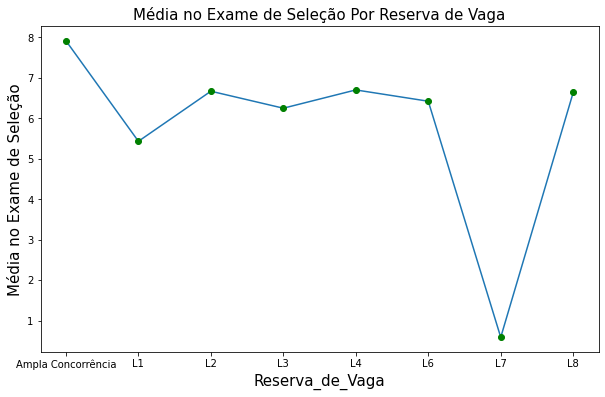

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(des['mean'])
plt.plot(des['mean'],'go')
plt.xlabel('Reserva_de_Vaga',fontsize=15)
plt.ylabel('Média no Exame de Seleção', fontsize=15)
plt.title('Média no Exame de Seleção Por Reserva de Vaga',fontsize=15 )
plt.show()

In [4]:
grup_reserva_mat=tabela['Nota_Matemática'].groupby(tabela['Reserva_de_vaga'])
des_mat=grup_reserva_mat.describe()
des_mat

,count,mean,std,min,25%,50%,75%,max
Reserva_de_vaga,,,,,,,,
Ampla Concorrência,273.0,7.598535,2.195784,0.0,6.600,8.10,9.30,10.0
L1,4.0,3.025000,4.050000,0.0,1.125,1.55,3.45,9.0
L2,81.0,6.492593,2.741431,0.0,5.400,7.20,8.60,10.0
L3,1.0,1.000000,NaN,1.0,1.000,1.00,1.00,1.0
L4,19.0,6.063158,3.048900,0.0,5.050,6.50,8.10,9.8
L6,75.0,5.626667,2.687978,0.0,5.000,6.20,7.40,10.0
L7,1.0,2.700000,NaN,2.7,2.700,2.70,2.70,2.7
L8,14.0,5.300000,3.117198,1.2,2.750,6.00,7.15,10.0


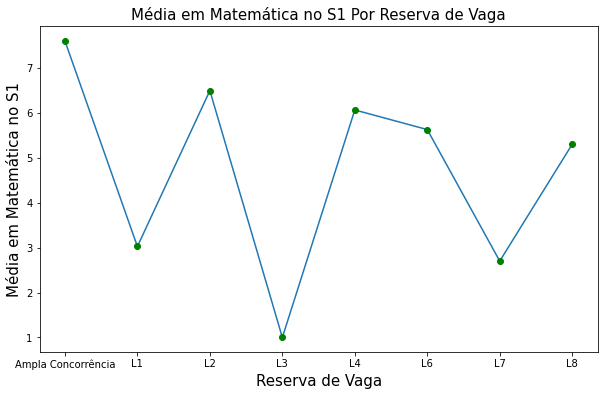

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(des_mat['mean'])
plt.plot(des_mat['mean'],'go')
plt.xlabel('Reserva de Vaga',fontsize=15)
plt.ylabel('Média em Matemática no S1', fontsize=15)
plt.title('Média em Matemática no S1 Por Reserva de Vaga',fontsize=15 )
plt.show()

In [6]:
reserva_vaga = tabela['Reserva_de_vaga'].value_counts() 
reserva_vaga

Ampla Concorrência    273
L2                     81
L6                     75
L4                     19
L8                     14
L1                      4
L7                      1
L3                      1
Name: Reserva_de_vaga, dtype: int64

In [7]:
freq_curso = tabela['Curso'].value_counts()
freq_curso

Técnico Integrado em Informática - Campus Fortaleza            84
Técnico Integrado em Telecomunicações - Campus Fortaleza       81
Técnico Integrado em Eletrotécnica - Campus Fortaleza          77
Técnico Integrado em Química - Campus Fortaleza                77
Técnico Integrado em Edificações - Campus Fortaleza            75
Técnico Integrado em Mecânica Industrial - Campus Fortaleza    74
Name: Curso, dtype: int64

In [8]:
integrado1=pd.get_dummies(tabela,columns=['Reserva_de_vaga','Curso'],drop_first=True)

In [9]:
integrado1

,Semestre,Nota_Matemática,Pontuação_Final,Reserva_de_vaga_L1,Reserva_de_vaga_L2,Reserva_de_vaga_L3,Reserva_de_vaga_L4,Reserva_de_vaga_L6,Reserva_de_vaga_L7,Reserva_de_vaga_L8,Curso_Técnico Integrado em Eletrotécnica - Campus Fortaleza,Curso_Técnico Integrado em Informática - Campus Fortaleza,Curso_Técnico Integrado em Mecânica Industrial - Campus Fortaleza,Curso_Técnico Integrado em Química - Campus Fortaleza,Curso_Técnico Integrado em Telecomunicações - Campus Fortaleza
0,2018.2,6.7,8.22,0,0,0,0,0,0,0,0,0,0,0,0
1,2018.2,7.5,7.96,0,0,0,0,0,0,0,0,0,0,0,0
2,2018.2,9.8,7.79,0,0,0,0,0,0,0,0,0,0,0,0
3,2018.2,8.4,7.52,0,0,0,0,0,0,0,0,0,0,0,0
4,2018.2,6.7,7.32,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2020.1,6.0,7.00,0,0,0,0,1,0,0,0,0,0,0,1
464,2020.1,6.3,6.83,0,0,0,0,1,0,0,0,0,0,0,1
465,2020.1,7.4,6.79,0,0,0,0,1,0,0,0,0,0,0,1
466,2020.1,8.1,6.33,0,0,0,0,0,0,1,0,0,0,0,1


In [10]:
integrado1['Situação_Matemática']=pd.cut(integrado1.Nota_Matemática, bins=[-1,5.9,10],labels=[0,1])
integrado1

,Semestre,Nota_Matemática,Pontuação_Final,Reserva_de_vaga_L1,Reserva_de_vaga_L2,Reserva_de_vaga_L3,Reserva_de_vaga_L4,Reserva_de_vaga_L6,Reserva_de_vaga_L7,Reserva_de_vaga_L8,Curso_Técnico Integrado em Eletrotécnica - Campus Fortaleza,Curso_Técnico Integrado em Informática - Campus Fortaleza,Curso_Técnico Integrado em Mecânica Industrial - Campus Fortaleza,Curso_Técnico Integrado em Química - Campus Fortaleza,Curso_Técnico Integrado em Telecomunicações - Campus Fortaleza,Situação_Matemática
0,2018.2,6.7,8.22,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2018.2,7.5,7.96,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2018.2,9.8,7.79,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2018.2,8.4,7.52,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2018.2,6.7,7.32,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2020.1,6.0,7.00,0,0,0,0,1,0,0,0,0,0,0,1,1
464,2020.1,6.3,6.83,0,0,0,0,1,0,0,0,0,0,0,1,1
465,2020.1,7.4,6.79,0,0,0,0,1,0,0,0,0,0,0,1,1
466,2020.1,8.1,6.33,0,0,0,0,0,0,1,0,0,0,0,1,1


In [11]:
integrado1.describe()

,Semestre,Nota_Matemática,Pontuação_Final,Reserva_de_vaga_L1,Reserva_de_vaga_L2,Reserva_de_vaga_L3,Reserva_de_vaga_L4,Reserva_de_vaga_L6,Reserva_de_vaga_L7,Reserva_de_vaga_L8,Curso_Técnico Integrado em Eletrotécnica - Campus Fortaleza,Curso_Técnico Integrado em Informática - Campus Fortaleza,Curso_Técnico Integrado em Mecânica Industrial - Campus Fortaleza,Curso_Técnico Integrado em Química - Campus Fortaleza,Curso_Técnico Integrado em Telecomunicações - Campus Fortaleza
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,2019.219872,6.896368,7.333312,0.008547,0.173077,0.002137,0.040598,0.160256,0.002137,0.029915,0.164530,0.179487,0.158120,0.164530,0.173077
std,0.678336,2.625890,1.159813,0.092153,0.378719,0.046225,0.197569,0.367236,0.046225,0.170534,0.371152,0.384170,0.365244,0.371152,0.378719
min,2018.200000,0.000000,0.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.100000,6.000000,6.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.200000,7.500000,7.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2020.100000,8.825000,8.175000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.100000,10.000000,9.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
classificador = integrado1.iloc[:,3:15]
previsor = integrado1.iloc[:,15]

In [13]:
classificador

,Reserva_de_vaga_L1,Reserva_de_vaga_L2,Reserva_de_vaga_L3,Reserva_de_vaga_L4,Reserva_de_vaga_L6,Reserva_de_vaga_L7,Reserva_de_vaga_L8,Curso_Técnico Integrado em Eletrotécnica - Campus Fortaleza,Curso_Técnico Integrado em Informática - Campus Fortaleza,Curso_Técnico Integrado em Mecânica Industrial - Campus Fortaleza,Curso_Técnico Integrado em Química - Campus Fortaleza,Curso_Técnico Integrado em Telecomunicações - Campus Fortaleza
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
463,0,0,0,0,1,0,0,0,0,0,0,1
464,0,0,0,0,1,0,0,0,0,0,0,1
465,0,0,0,0,1,0,0,0,0,0,0,1
466,0,0,0,0,0,0,1,0,0,0,0,1


In [14]:
previsor

0      1
1      1
2      1
3      1
4      1
      ..
463    1
464    1
465    1
466    1
467    1
Name: Situação_Matemática, Length: 468, dtype: category
Categories (2, int64): [0 < 1]

In [15]:
# 0 como resultado: número de reprovados
# 1 como resultado: número de aprovados

np.unique(integrado1['Situação_Matemática'], return_counts = True)

(array([0, 1], dtype=int64), array([111, 357], dtype=int64))

<AxesSubplot:xlabel='Situação_Matemática', ylabel='count'>

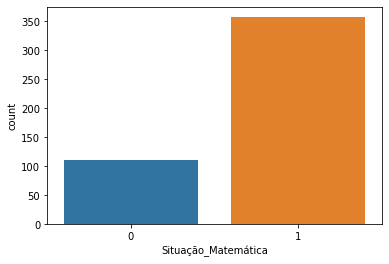

In [16]:
sns.countplot(x =integrado1['Situação_Matemática'])

In [17]:
classificador.shape

(468, 12)

In [18]:
clf = GaussianNB()


In [21]:
pip install -U imbalanced-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\Rafael\\anaconda3\\Lib\\site-packages\\~klearn\\datasets\\_svmlight_format_fast.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [19]:
naive = GaussianNB()
naive.fit(X_treinamento_over, y_treinamento_over)
previsoes2 = naive.predict(X_teste_over)
previsoes2

NameError: name 'X_treinamento_over' is not defined